# LangChain: Memory

## Outline
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory



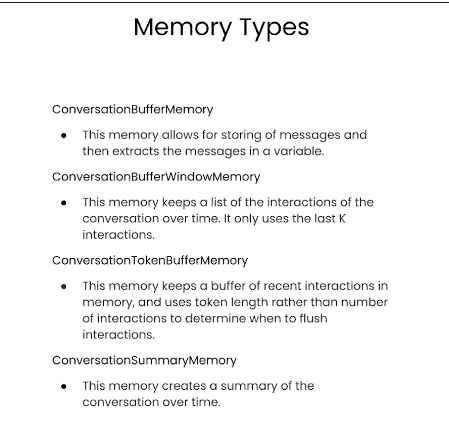

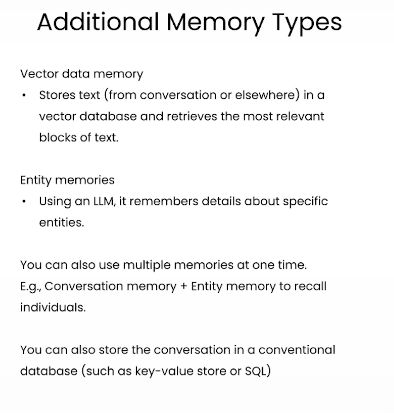

## ConversationBufferMemory

In [1]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

import warnings
warnings.filterwarnings('ignore')

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

In [2]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [72]:
llm = ChatOpenAI(temperature=0.0, model=llm_model)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [73]:
conversation.predict(input="Hi, my name is Hammad")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Hammad
AI:

> Finished chain.


"Hello Hammad! It's nice to meet you. How can I assist you today?"

In [74]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Hammad
AI: Hello Hammad! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'1 + 1 equals 2. Is there anything else you would like to know?'

In [42]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Hammad
AI: Hello Hammad! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI: 1 + 1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI:

> Finished chain.


'Your name is Hammad. Is there anything else you would like to know or discuss?'

In [43]:
print(memory.buffer)

Human: Hi, my name is Hammad
AI: Hello Hammad! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI: 1 + 1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI: Your name is Hammad. Is there anything else you would like to know or discuss?


In [44]:
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Hammad\nAI: Hello Hammad! It's nice to meet you. How can I assist you today?\nHuman: What is 1+1?\nAI: 1 + 1 equals 2. Is there anything else you would like to know?\nHuman: What is my name?\nAI: Your name is Hammad. Is there anything else you would like to know or discuss?"}

In [45]:
memory = ConversationBufferMemory()

In [46]:
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})

In [47]:
print(memory.buffer)

Human: Hi
AI: What's up


In [48]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [49]:
memory.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})

In [50]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

## ConversationBufferWindowMemory

In [51]:
from langchain.memory import ConversationBufferWindowMemory

In [52]:
memory = ConversationBufferWindowMemory(k=1)               

In [53]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})


In [54]:
memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [55]:
llm = ChatOpenAI(temperature=0.0, model=llm_model)
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [56]:
conversation.predict(input="Hi, my name is Hammad")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Hammad
AI:

> Finished chain.


"Hello Hammad! It's nice to meet you. How can I assist you today?"

In [57]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Hammad
AI: Hello Hammad! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'1+1 equals 2. Is there anything else you would like to know?'

In [58]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is 1+1?
AI: 1+1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI:

> Finished chain.


"I'm sorry, I do not have access to personal information such as your name. Is there anything else you would like to know?"

## ConversationTokenBufferMemory

In [59]:
#!pip install tiktoken

In [60]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0, model=llm_model)

In [61]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=50)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [62]:
memory.load_memory_variables({})

{'history': 'AI: Amazing!\nHuman: Backpropagation is what?\nAI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

## ConversationSummaryMemory

In [63]:
from langchain.memory import ConversationSummaryBufferMemory

In [64]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

In [65]:
memory.load_memory_variables({})

{'history': "System: The human and AI exchange greetings and discuss the day's schedule. The AI informs the human of a morning meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The human is advised to bring their laptop to showcase the latest LLM demo during the lunch meeting."}

In [66]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [67]:
conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human and AI exchange greetings and discuss the day's schedule. The AI informs the human of a morning meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The human is advised to bring their laptop to showcase the latest LLM demo during the lunch meeting.
Human: What would be a good demo to show?
AI:

> Finished chain.


"For the LLM demo, you could showcase the latest language model capabilities, such as text generation, language translation, sentiment analysis, and question-answering. You could also highlight the model's accuracy, speed, and efficiency compared to other language models in the market. Additionally, you could demonstrate how the model can be fine-tuned for specific tasks or industries to showcase its versatility and customization options."

In [68]:
memory.load_memory_variables({})

{'history': "System: The human and AI exchange greetings and discuss the day's schedule. The AI informs the human of a morning meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The human is advised to bring their laptop to showcase the latest LLM demo during the lunch meeting. The human asks what would be a good demo to show.\nAI: For the LLM demo, you could showcase the latest language model capabilities, such as text generation, language translation, sentiment analysis, and question-answering. You could also highlight the model's accuracy, speed, and efficiency compared to other language models in the market. Additionally, you could demonstrate how the model can be fine-tuned for specific tasks or industries to showcase its versatility and customization options."}